# 데이터 시각화 및 인사이트도출

### 데이터 불러오기

In [1]:
# kto_total.xlsx 파일불러오기
import pandas as pd

#시각화라이브러리 추가
import matplotlib.pyplot as plt

#한글처리 라이브러리 
from matplotlib import font_manager, rc

#시스템 OS 확인을 위한 라이브러리 
import platform

In [2]:
# 운영체제별 폰트 정의하기
if platform.system() == "Windows" :
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family = font_name)

elif platform.system() == "Darwin":
    rc("font", family = "AppleGothic")
    #plt.rcParms['axes.unicode_minus'] = False
else :
    print("Check your OS System....")

In [3]:
file_path = "./files/kto_total.xlsx"
df = pd.read_excel(file_path,index_col=0) #컬럼명의 위치지정

df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.96,35.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.32,6.3
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.39,2.4
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.00,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.08,2.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.22,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.60,0.0
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.78,0.1
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.16,0.0


In [4]:
# 중국 국적에 대한 데이터를 필터링해서 조회하기.. 
condition =( df["국적"] == "중국")
#필터링 결과 확인하기 
df_filter = df[condition]
df_filter.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.23,25.1
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.72,27.9
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.20,26.8
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.70,30.4
6917,중국,451570,3625,388,44291,78238,578112,2019-08,아시아,78.11,28.5


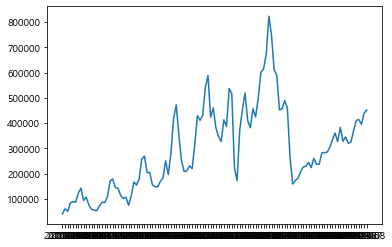

In [5]:
# 중국 관광객에 대한 년월별 추이 시각화분석(시계열그래프 사용)
plt.plot(df_filter["기준년월"],df_filter["관광"])
plt.show()

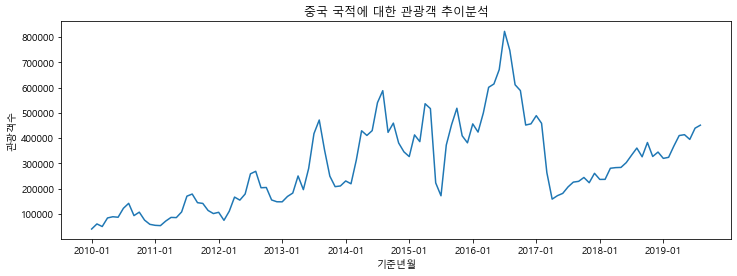

In [6]:
# 그래프 꾸미기
# 그래프 크기 조절 
plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize = (12,4))
#그래프에 데이터 넣기
plt.plot(df_filter["기준년월"],df_filter["관광"])

#그래프 제목 넣기
plt.title("중국 국적에 대한 관광객 추이분석")

#x축에 대한 라벨 추가
plt.xlabel("기준년월")
#y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..
plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01",
            "2015-01","2016-01","2017-01","2018-01","2019-01"])
plt.show()

In [7]:
# 관광객 전체 비율이 가장 높은 5개 국가 조회하기 
df.sort_values("전체비율(%)",ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
4697,중국,823016,4103,354,7122,82924,917519,2016-07,아시아,89.70,48.3
4757,중국,747818,4352,270,35523,85808,873771,2016-08,아시아,85.59,44.9
4637,중국,671493,4492,539,10378,71632,758534,2016-06,아시아,88.53,43.2
4337,중국,456636,3723,140,4383,57099,521981,2016-01,아시아,87.48,42.4
4577,중국,614636,5247,604,9356,76001,705844,2016-05,아시아,87.08,41.2


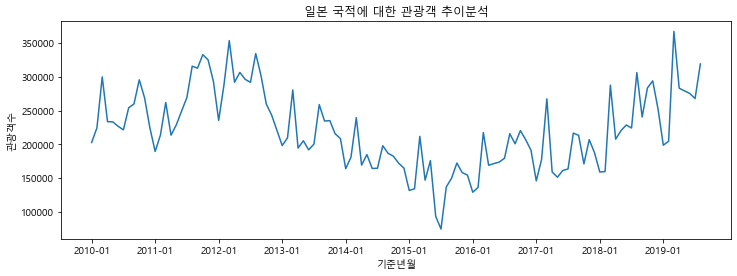

In [8]:
# 그래프 꾸미기
# 그래프 크기 조절 

condition =( df["국적"] == "일본")
condition 

df_filter = df[condition]


plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize = (12,4))
#그래프에 데이터 넣기
plt.plot(df_filter["기준년월"],df_filter["관광"])

#그래프 제목 넣기
plt.title("일본 국적에 대한 관광객 추이분석")

#x축에 대한 라벨 추가
plt.xlabel("기준년월")
#y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..
plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01",
            "2015-01","2016-01","2017-01","2018-01","2019-01"])
plt.show()

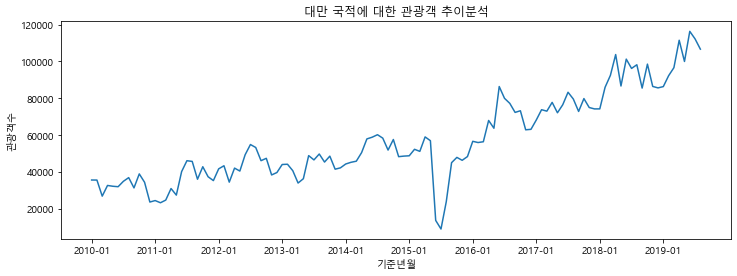

In [9]:
# 그래프 꾸미기
# 그래프 크기 조절 

condition =( df["국적"] == "대만")
condition 

df_filter = df[condition]

plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize = (12,4))
#그래프에 데이터 넣기
plt.plot(df_filter["기준년월"],df_filter["관광"])

#그래프 제목 넣기
plt.title("대만 국적에 대한 관광객 추이분석")

#x축에 대한 라벨 추가
plt.xlabel("기준년월")
#y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..
plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01",
            "2015-01","2016-01","2017-01","2018-01","2019-01"])
plt.show()

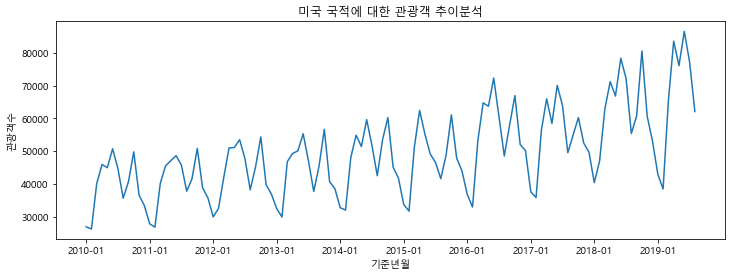

In [10]:
# 그래프 꾸미기
# 그래프 크기 조절 

condition =( df["국적"] == "미국")
condition 

df_filter = df[condition]

plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize = (12,4))
#그래프에 데이터 넣기
plt.plot(df_filter["기준년월"],df_filter["관광"])

#그래프 제목 넣기
plt.title("미국 국적에 대한 관광객 추이분석")

#x축에 대한 라벨 추가
plt.xlabel("기준년월")
#y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..
plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01",
            "2015-01","2016-01","2017-01","2018-01","2019-01"])
plt.show()

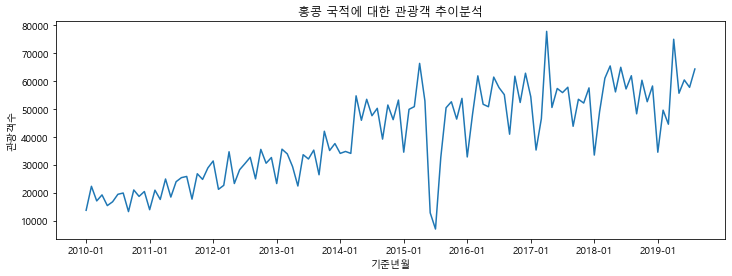

In [11]:
# 그래프 꾸미기
# 그래프 크기 조절 

condition =( df["국적"] == "홍콩")
condition 

df_filter = df[condition]

plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize = (12,4))
#그래프에 데이터 넣기
plt.plot(df_filter["기준년월"],df_filter["관광"])

#그래프 제목 넣기
plt.title("홍콩 국적에 대한 관광객 추이분석")

#x축에 대한 라벨 추가
plt.xlabel("기준년월")
#y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정..
plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01",
            "2015-01","2016-01","2017-01","2018-01","2019-01"])
plt.show()

##  데이터를 하나로 합쳐서 for문 만들기

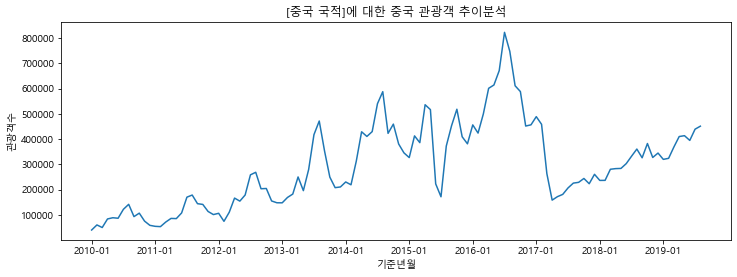

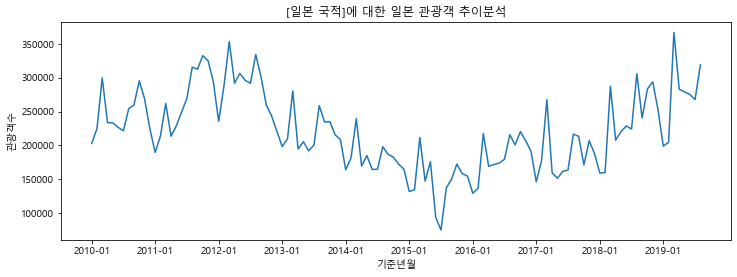

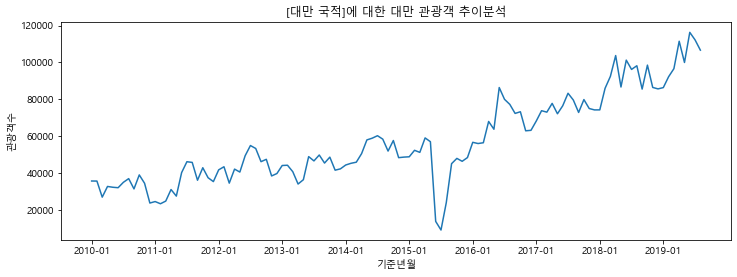

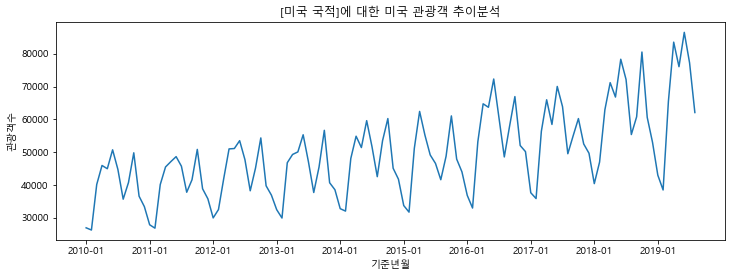

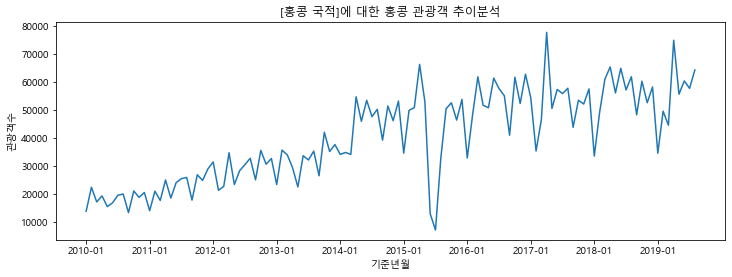

In [51]:
#기준 만들기 
cntry_list = ["중국","일본","대만","미국","홍콩"]

for cntry in cntry_list  :
    
            condition = (df["국적"] == cntry)
            condition 

            df_filter = df[condition]

            plt.rc('font', family = 'Malgun Gothic')

            plt.figure(figsize = (12,4))
            #그래프에 데이터 넣기
            plt.plot(df_filter["기준년월"],df_filter["관광"])

            #그래프 제목 넣기
            plt.title( "[{} 국적]에 대한 {} 관광객 추이분석".format(cntry,cntry))

            #x축에 대한 라벨 추가
            plt.xlabel("기준년월")
            #y축에 대한 라벨 추가
            plt.ylabel("관광객수")

            # x축에 대한 눈금을 조정..
            plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01",
                        "2015-01","2016-01","2017-01","2018-01","2019-01"])
            plt.show()

## 히트맵그리기

In [13]:
# 히트맵: 전체시계열 데이터에 대한 이슈를 한눈에 보기
# 변수 3개가 필요함

In [26]:
#년도와 월만 조회해주세요
# 기준년월에서 년도만 추출하기
# 기준년월에서 월만 추출하기
df["년도"] = df["기준년월"].str.slice(0,4)

df["월"] = df["기준년월"].str.slice(5,7) #처음부터 7번째 까지! 

In [27]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.96,35.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.32,6.3,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.39,2.4,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.00,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.08,2.3,2010,01


In [29]:
df_filter = df[(df["국적"] == "중국")]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.30,7.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.10,9.5,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.58,6.5,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.05,11.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.80,12.2,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.23,25.1,2019,04
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.72,27.9,2019,05
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.20,26.8,2019,06
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.70,30.4,2019,07


In [37]:
#히트맵 그리는 순서
# 1. 피봇으로 데이터집계
# 2. 피봇 결과를 히트맵에 적용
df_pivot = df_filter.pivot_table(values = "관광",
                      index = "년도",  # index= y축
                      columns = "월")  # columns = X축

In [38]:
# 2. 히트맵 그리기
# 히트맵은 시본 라이브러리를 함께 사용
import seaborn as sns 

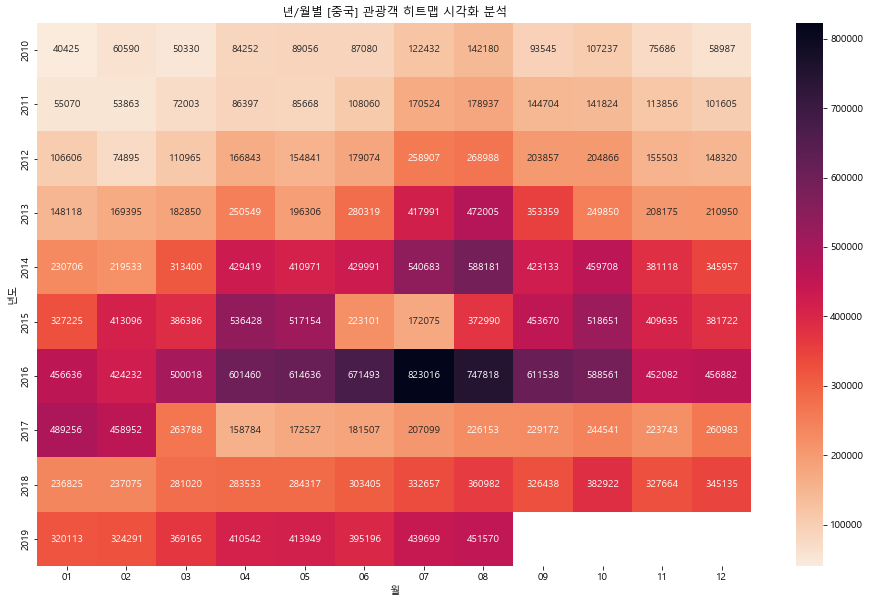

In [45]:
# 그래프 크기 설정
plt.figure(figsize = (16, 10)) #정사각형에 가까운형태

#피봇 데이터 넣어서 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")

#타이틀 넣기
plt.title("년/월별 [중국] 관광객 히트맵 시각화 분석")

#보여주기
plt.show()

In [47]:
# 중국, 일본, 대만, 미국, 홍콩히트맵 그리기

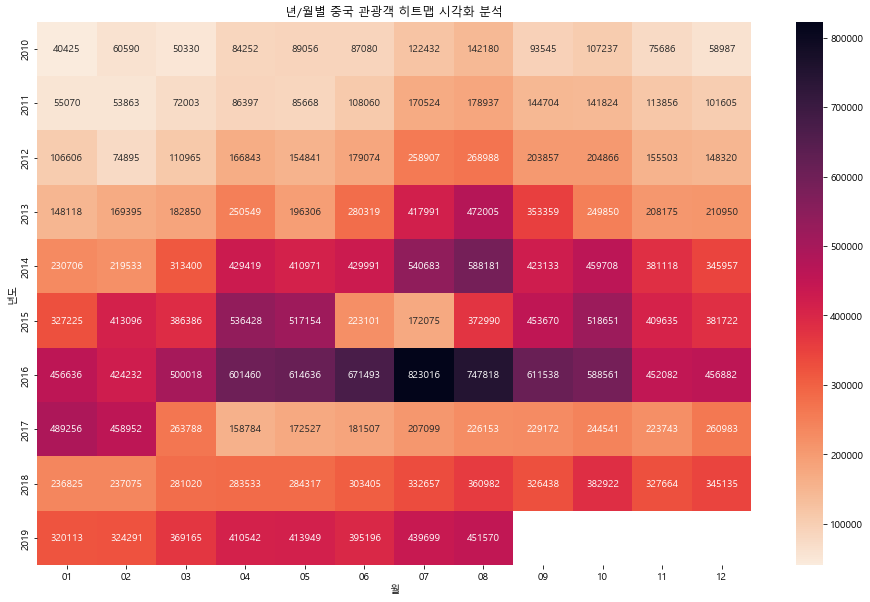

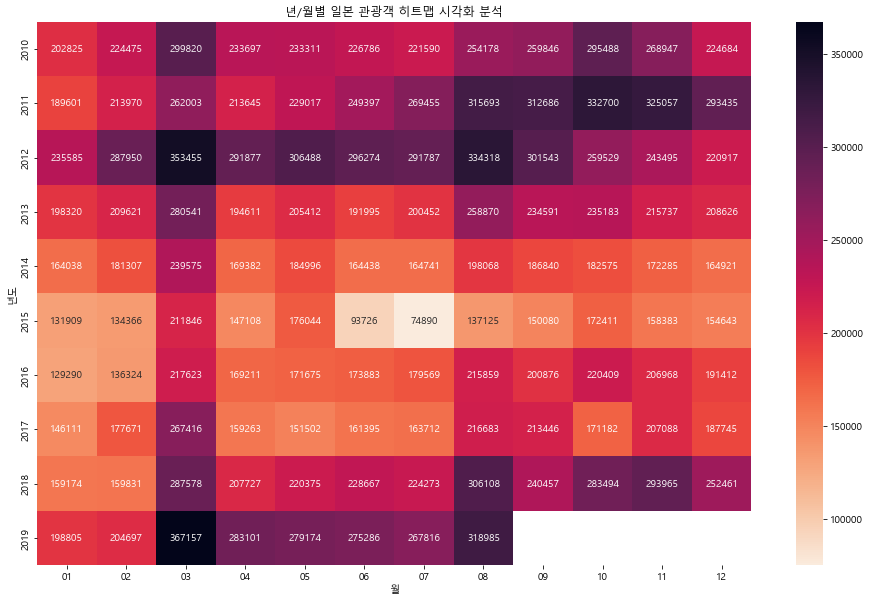

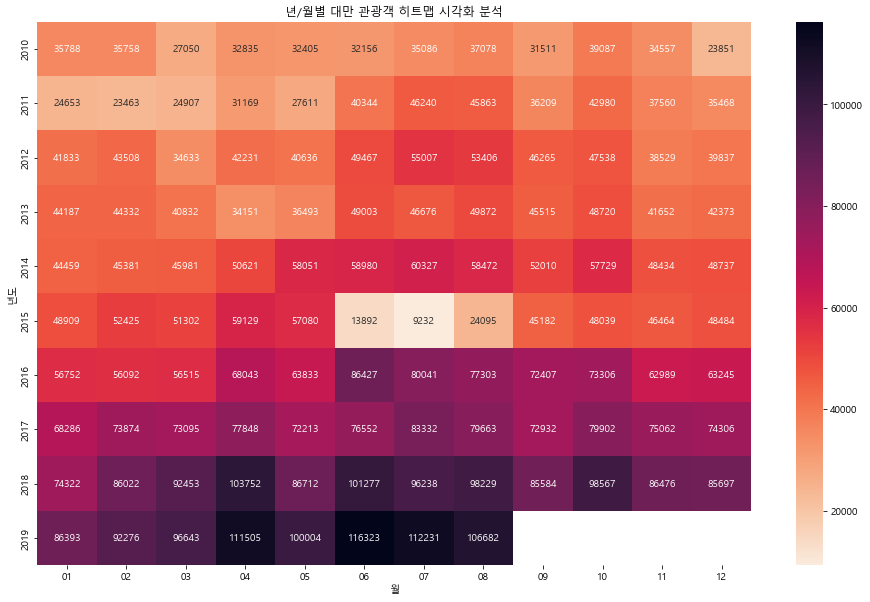

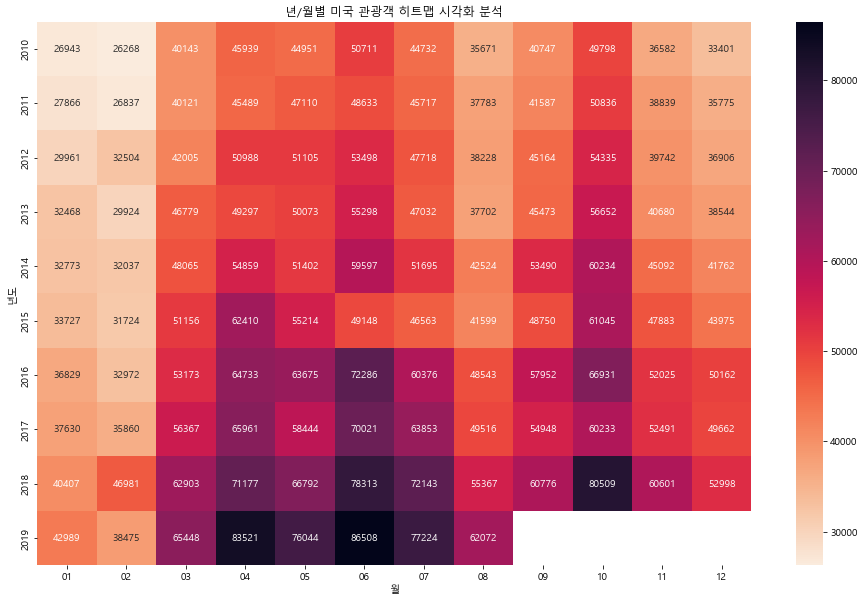

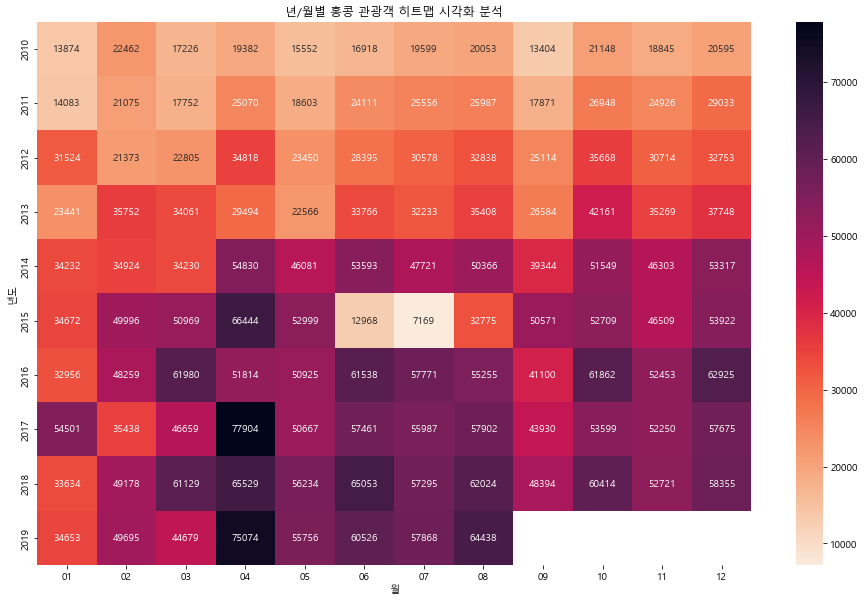

In [53]:
cntry_list = ["중국","일본","대만","미국","홍콩"]

for cntry in cntry_list  :
    
            df_filter = df[(df["국적"] == cntry)]

            df_pivot = df_filter.pivot_table(values = "관광",
                      index = "년도",  # index= y축
                      columns = "월")  # columns = X축
            
            # 그래프 크기 설정
            plt.figure(figsize = (16, 10)) #정사각형에 가까운형태

            #피봇 데이터 넣어서 그래프 그리기
            sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")

            #타이틀 넣기
            plt.title("년/월별 {} 관광객 히트맵 시각화 분석".format(cntry))

            #보여주기
            plt.show()


In [ ]:
# 해석
# 트랜드 : 
# 계절적 : 
# 이벤트(인사이트,이슈):